In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns

import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from collections import Counter
import zipfile
import json

### Exploratory data analysis

In [2]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
numericFeatures = ['Age', 'SibSp', 'Parch', 'Fare']
catgoricalFeatures = ['Pclass', 'Sex', 'Embarked']

#### Plotting functions

#### Distribution of a numerical variable partitioned by the class label
    df.groupby('Survived')['Age'].hist(bins=20, alpha=0.5)
    df['Age'].hist(by=df['Survived'])
    df.reset_index().pivot('index','Survived','Age').hist()

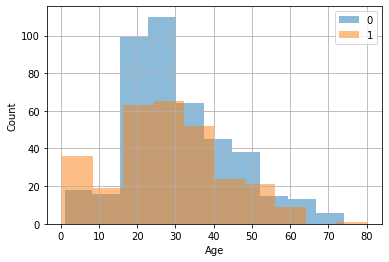

In [8]:
def groupedHistogram(df, groupbyCol, plotCol):
    for label, labelDf in df.groupby(groupbyCol):
        labelDf[plotCol].hist(label=label, alpha=0.5)
    plt.xlabel(plotCol)
    plt.legend(loc='upper right')
    plt.ylabel('Count')
    
groupedHistogram(df, 'Survived', 'Age')

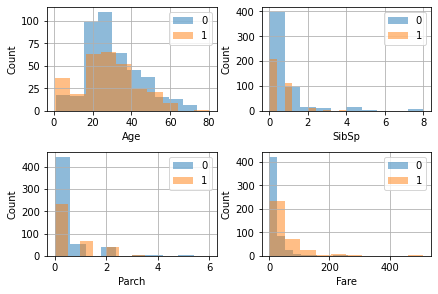

In [9]:
def groupedHistogramOfMultipleVariables(df, groupbyCol, plotCols, plotGrid=None):
    if not plotGrid:
        ncols = 3
        nrows = math.ceil(len(plotCols)/ncols)
    else:
        nrows, ncols = plotGrid
        
    fig, axes = plt.subplots(nrows, ncols)
    axes = axes.reshape(-1, ncols) # Make sure axes is a 2D array  
    
    for k, col in enumerate(plotCols):
        i, j = divmod(k, ncols)       
        ax=axes[i][j]
        for label, labelDf in df.groupby(groupbyCol):
            labelDf[col].hist(label=label, alpha=0.5, ax=ax)
        ax.set_xlabel(col)
        ax.legend(loc='upper right')
        ax.set_ylabel('Count')
            
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
                
        
groupedHistogramOfMultipleVariables(df, 'Survived', numericFeatures, plotGrid=(2, 2))

#### Distribution of a categorical variable partitioned by the class label
    df.groupby('Pclass')['Survived'].value_counts().unstack(0).plot.bar()
    df.groupby(['Pclass', 'Survived']).size().unstack(0).plot.bar()

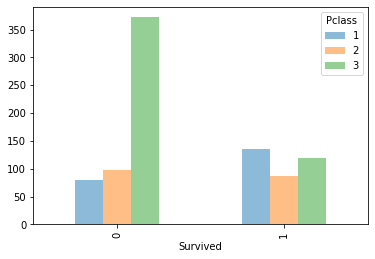

In [10]:
df.groupby('Pclass')['Survived'].value_counts().unstack(0).plot.bar(alpha=0.5);

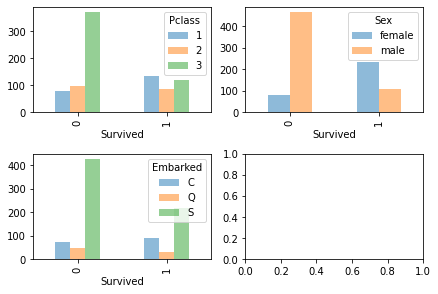

In [11]:
def groupedBarplotOfMultipleCategoricalVariables(df, groupbyCol, plotCols, plotGrid=None):
    if not plotGrid:
        ncols = 3
        nrows = math.ceil(len(plotCols)/ncols)
    else:
        nrows, ncols = plotGrid
    fig, axes = plt.subplots(nrows, ncols)
    axes = axes.reshape(-1, ncols) # Make sure axes is a 2D array
    
    for k, col in enumerate(plotCols):        
        i, j = divmod(k, ncols)
        countsDf = df.groupby(groupbyCol)[col].value_counts().unstack(1)
        countsDf.plot.bar(ax=axes[i][j], alpha=0.5)
        
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
                
groupedBarplotOfMultipleCategoricalVariables(df, 'Survived', catgoricalFeatures, (2,2))

#### Feature correlation

In [12]:
print(df[numericFeatures].corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


In [13]:
df[numericFeatures].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,SibSp,Parch,Fare
Age,1.00,-0.31,-0.19,0.10
SibSp,-0.31,1.00,0.41,0.16
Parch,-0.19,0.41,1.00,0.22
Fare,0.10,0.16,0.22,1.00


### Feature engineering

### Missing values
* Column 'Embarked' has 2 missing values. We will impute them using scikit-learn
* Column 'Age' has 177 missing values. We will impute them using scikit-learn as well
* Column 'Cabin' has 687 missing values. We will create derived features using this column taking into account the missing values

### Derived features

In [14]:
df['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
              ..
B50            1
F E69          1
A16            1
B101           1
E31            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
df.loc[df['Cabin'].isna(), 'Cabin'] = 'Missing'  # There is no cabin that has label 'M'

In [16]:
df['firstCabinType'] = df['Cabin'].str.extract(r'([A-Za-z])')

In [17]:
df['hasMultipleCabins'] = (df['Cabin'].str.count(r'([A-Za-z])') > 1)  # Has multile cabins

In [18]:
df['firstCabinType'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: firstCabinType, dtype: int64

In [19]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [20]:
df['isNumericTicket'] = df['Ticket'].str.isnumeric()

In [21]:
df['ticketLetters'] = df['Ticket'].str.lower().str.findall(r'([a-z])').apply(''.join)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              891 non-null    object 
 11  Embarked           889 non-null    object 
 12  firstCabinType     891 non-null    object 
 13  hasMultipleCabins  891 non-null    bool   
 14  isNumericTicket    891 non-null    bool   
 15  ticketLetters      891 non-null    object 
dtypes: bool(2), float64(2), in

In [23]:
df['nameTitle'] = df['Name'].str.extract(r'\, (.*?)\.')  # Extract letters between ',' and '.'

In [24]:
df['nameTitle'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Ms                1
Sir               1
Don               1
Jonkheer          1
the Countess      1
Capt              1
Mme               1
Name: nameTitle, dtype: int64

### Feature pipeline

In [25]:
from sklearn import base
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn import set_config

In [26]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
X = df.copy()
y = df['Survived']

In [28]:
numericFeatures = ['Age', 'SibSp', 'Parch', 'Fare']
catgoricalFeatures = ['Pclass', 'Sex', 'Embarked']

In [29]:
class ColumnSelector(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]
    
    def get_feature_names(self):
        return self.columns.tolist()

In [30]:
class CabinFeatures(base.BaseEstimator, base.TransformerMixin):
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X.loc[X['Cabin'].isna(), 'Cabin'] = 'Missing'  # There is no cabin that has label 'M'
        firstCabinType = X['Cabin'].str.extract(r'([A-Za-z])')
        hasMultipleCabins = (X['Cabin'].str.count(r'([A-Za-z])') > 1)  # Has multile cabins        
        return pd.concat([firstCabinType, hasMultipleCabins], axis=1)
    
    def get_feature_names(self):
        return ['firstCabinType', 'hasMultipleCabins']

In [31]:
class TicketFeatures(base.BaseEstimator, base.TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        isNumericTicket = X['Ticket'].str.isnumeric()
        ticketLetters = X['Ticket'].str.lower().str.findall(r'([a-z])').apply(''.join)
        return pd.concat([isNumericTicket, ticketLetters], axis=1)
    
    def get_feature_names(self):
        return ['isNumericTicket', 'ticketLetters']

In [32]:
class NameFeatures(base.BaseEstimator, base.TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        nameTitle = X['Name'].str.extract(r'\, (.*?)\.')  # Extract letters between ',' and '.'
        return nameTitle
    
    def get_feature_names(self):
        return ['nameTitle']

In [33]:
categoricalFeatureUnion = FeatureUnion([
    ('orig_cat_feats', ColumnSelector(catgoricalFeatures)),
    ('cabin', CabinFeatures()),
    ('ticket', TicketFeatures()),
    ('name', NameFeatures())
])

#categoricalFeatureUnion.fit_transform(X)    
#print (categoricalFeatureUnion.get_feature_names())

set_config(display='diagram')
categoricalFeatureUnion

FeatureUnion(transformer_list=[('orig_cat_feats',
                                ColumnSelector(columns=['Pclass', 'Sex',
                                                        'Embarked'])),
                               ('cabin', CabinFeatures()),
                               ('ticket', TicketFeatures()),
                               ('name', NameFeatures())])

In [34]:
numericTransformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

catgoricalTransformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numericTransformer, numericFeatures),
        ('cat', catgoricalTransformer, catgoricalFeatures)])

set_config(display='diagram')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

### Model: Logistic Regression

In [36]:
def computeScore(model, X, y, cv):
    # Accuracy score
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    #print (scores)
    return scores.mean()

In [37]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', LogisticRegression(C=1.0))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.754


In [38]:
computeScore(clf, X_train, y_train, cv)

[0.74125874 0.76223776 0.75524476 0.78321678 0.87412587 0.78321678
 0.79020979 0.84615385 0.79020979 0.8041958 ]


0.793006993006993

In [39]:
print (clf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]

In [40]:
param_grid = {'clf__C': np.logspace(-2, 2, 5, endpoint=True)}

In [41]:
grid_search = GridSearchCV(clf, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

print(("best logistic regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best logistic regression from grid search: 0.754


In [42]:
grid_search.best_params_

{'clf__C': 0.1}

In [43]:
grid_search.get_params()

{'cv': ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['Age', 'SibSp', 'Parch', 'Fare']),
                                   ('cat',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Pclass', 'Sex', 'Embarked'])])),
  ('clf', LogisticRegression())],
 'estimator_

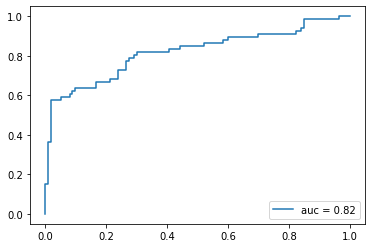

In [44]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="auc = {:.2f}".format(auc))
plt.legend(loc=4)
plt.show()